In [2]:
import pymc_model as pm
import pymc
import latin_hypercube as lh
import numpy as np

This study is only focusing on glaciers ['03473'] in region [15].
(1, 882) (882,)
[ 0.] (1,)


/home/tushar/anaconda3/envs/pymc/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [8]:
for i in range(5):
    name = 'testconvergence' + str(i+1) + '.pickle'
    print(name)

testconvergence1.pickle
testconvergence2.pickle
testconvergence3.pickle
testconvergence4.pickle
testconvergence5.pickle


In [2]:
m = pm.run_MCMC(iterations=10000, dbname='10000samples.pickle')

 [-----------------100%-----------------] 10001 of 10000 complete in 5741.3 sec

In [4]:
m.db.close()

In [3]:
m.trace('tempchange')[:]

array([-0.18076052,  1.4996182 ,  1.4996182 , ...,  2.34386846,
        2.34386846,  2.34386846])

Plotting ddfsnow
Plotting precfactor
Plotting tempchange


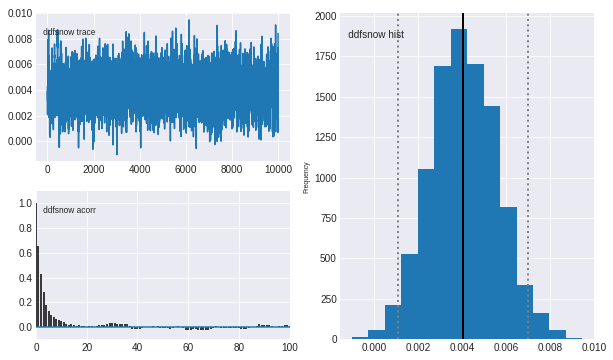

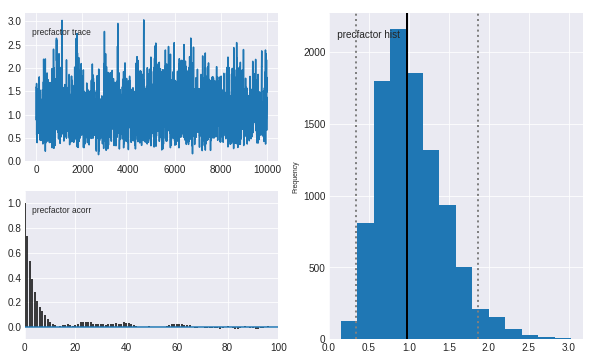

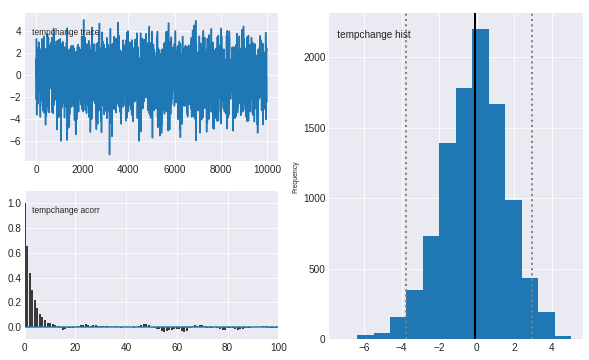

In [7]:
pymc.Matplot.plot(m)

In [3]:
db = pymc.database.pickle.load('10000samples.pickle')

In [4]:
tempchange = db.trace('tempchange')[8000:]
precfactor = db.trace('precfactor')[8000:]
ddfsnow = db.trace('ddfsnow')[8000:]
massbal = db.trace('mass_bal')[8000:]

In [5]:
ensemble = lh.sample2(tempchange=tempchange, ddfsnow=ddfsnow,
                      massbal=massbal, precfactor=precfactor,
                     samples=200)

sorted_df
       tempchange  precfactor   ddfsnow   massbal  sorted_index
924     4.129668    0.802879  0.005976 -4.307169             0
925     4.129668    0.802879  0.005882 -4.302039             1
922     4.129668    1.010699  0.005976 -4.201393             2
923     4.129668    1.010699  0.005976 -4.201393             3
1150    3.476791    0.371645  0.005326 -3.921730             4
375     3.995042    1.103610  0.004005 -3.824078             5
286     4.034470    1.341149  0.004696 -3.805887             6
1149    3.476791    0.371645  0.003083 -3.787951             7
706     3.774844    0.772309  0.003309 -3.750298             8
2       4.270070    1.155542  0.002505 -3.742509             9
708     3.731769    0.772309  0.003322 -3.711807            10
707     3.731769    0.772309  0.003322 -3.711807            11
1949    3.877008    1.454690  0.005585 -3.681917            12
1948    3.877008    1.454690  0.005585 -3.681917            13
1015    3.282692    0.651636  0.006297 -3.62

In [6]:
mean = np.mean(ensemble['massbal'])
std = np.std(ensemble['massbal'])

In [7]:
mean, std

(-0.636665483346419, 1.0895506164526876)

In [22]:
pm.observed_massbal, pm.observed_error

(-0.54100000000000004, 0.24299999999999999)

In [10]:
w_mean = np.mean(db.trace('mass_bal')[:])
w_std = np.std(db.trace('mass_bal')[:])

In [11]:
w_mean, w_std

(-0.63421225417519334, 1.1182598172468201)